<a href="https://colab.research.google.com/github/dcafarelli/CMT-ABAW2020-EXPR/blob/main/data_labeling/three_classes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group labels in 3 different classes
- Neutral = 0
- Positive (happiness) = 1
- Negative (anger, fear, sadness, disgust) = 2

In [ ]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

In [ ]:
new_classes = ('Neutral', 'Positive', 'Negative')

# TRAINING SET PART

In [ ]:
pkl_path = '/annotations/aff_wild_expW_train_set.pkl'

In [ ]:
original_annotations = pd.read_pickle(pkl_path)

In [ ]:
#remove the surprise class
no_surprise = pd.DataFrame()

no_surprise = original_annotations[original_annotations.label != 6]

In [ ]:
classes = ('Neutral', 'Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness')

Distribution of classes:


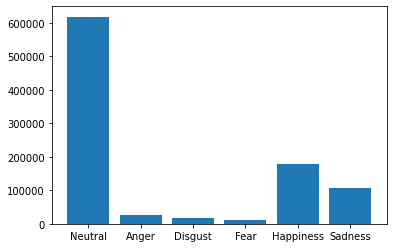

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(no_surprise['label'], return_counts=True)
ax.bar(classes, counts)
ax.set_xticks(classes)
plt.show()

In [ ]:
#change labels value
no_surprise = no_surprise.copy()
no_surprise.loc[no_surprise.label == 1, 'label'] = 2
no_surprise.loc[no_surprise.label == 4, 'label'] = 1

Distribution of classes:


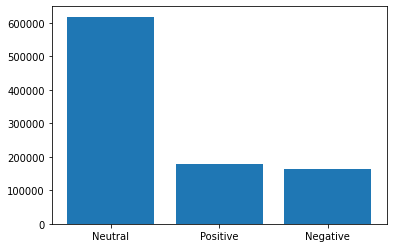

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(no_surprise['label'], return_counts=True)
ax.bar(new_classes, counts)
ax.set_xticks(new_classes)
plt.show()

In [ ]:
save_path = os.path.join('/annotations', 'three_classes_label.pkl')
print(save_path)
no_surprise.to_pickle(save_path)

/content/gdrive/My Drive/TESI/FER/AffWild2/annotations/three_classes_label.pkl


**Balance the new dataset**

This section code randomly removes samples from the new dataset for balancing purpose

In [ ]:
#Make the samples all the same length in order to balance the dataset
newtask_train_set = pd.read_pickle('/annotations/three_classes_label.pkl')

In [ ]:
c0 = newtask_train_set[newtask_train_set.label.eq(0)].sample(162510) #grab samples random from class 0

In [ ]:
c1 = newtask_train_set[newtask_train_set.label.eq(1)].sample(162510) #grab samples random from class 1

In [ ]:
c2 = newtask_train_set[newtask_train_set.label.eq(2)]

In [ ]:
balance_newtask = pd.concat([c0, c1, c2])

In [ ]:
#balance_newtask = balance_newtask.reset_index()
balance_newtask = balance_newtask.drop(['index'], axis = 1)

In [ ]:
balance_newtask

In [ ]:
balance_newtask['label'].value_counts()

2    162510
1    162510
0    162510
Name: label, dtype: int64

Distribution of classes:


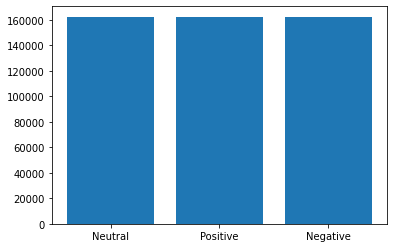

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(balance_newtask['label'], return_counts=True)
ax.bar(new_classes, counts)
ax.set_xticks(new_classes)
plt.show()

In [ ]:
save_path = os.path.join('/content/gdrive/My Drive/TESI/FER/AffWild2/annotations', 'three_classes_balanced.pkl')
print(save_path)
balance_newtask.to_pickle(save_path)

/content/gdrive/My Drive/TESI/FER/AffWild2/annotations/three_classes_balanced.pkl


# VALIDATION SET PART

In [ ]:
val_set_original = pd.read_pickle('/annotations/val_set.pkl')

In [ ]:
#remove the surprise class
no_surprise_val = pd.DataFrame()

no_surprise_val = val_set_original[val_set_original.label != 6]

In [ ]:
no_surprise_val = no_surprise_val.copy()
no_surprise_val.loc[no_surprise_val.label == 1, 'label'] = 2
no_surprise_val.loc[no_surprise_val.label == 4, 'label'] = 1

In [ ]:
no_surprise_val['label'].value_counts()

0    181261
2     55876
1     50360
Name: label, dtype: int64

In [ ]:
save_path = os.path.join('/annotations', 'three_classes_val_label.pkl')
print(save_path)
no_surprise_val.to_pickle(save_path)

/content/gdrive/My Drive/TESI/FER/AffWild2/annotations/three_classes_val_label.pkl


In [ ]:
df = pd.read_pickle(save_path)

Distribution of classes:


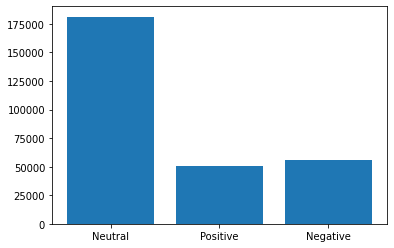

In [ ]:
print('Distribution of classes:')
fig, ax = plt.subplots()
_, counts = np.unique(df['label'], return_counts=True)
ax.bar(new_classes, counts)
ax.set_xticks(new_classes)
plt.show()